<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-dictionary-of-sample-details" data-toc-modified-id="Create-dictionary-of-sample-details-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create dictionary of sample details</a></span></li><li><span><a href="#Import-the-sample-variant-details" data-toc-modified-id="Import-the-sample-variant-details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the sample variant details</a></span></li><li><span><a href="#Import-which-samples-have-missing-drivers" data-toc-modified-id="Import-which-samples-have-missing-drivers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import which samples have missing drivers</a></span></li><li><span><a href="#Which-samples-have-which-evolution-pattern" data-toc-modified-id="Which-samples-have-which-evolution-pattern-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Which samples have which evolution pattern</a></span></li><li><span><a href="#Count-the-number-of-each-gene-for-each-sample" data-toc-modified-id="Count-the-number-of-each-gene-for-each-sample-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Count the number of each gene for each sample</a></span></li><li><span><a href="#Plot-the-figure" data-toc-modified-id="Plot-the-figure-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot the figure</a></span><ul class="toc-item"><li><span><a href="#Cases" data-toc-modified-id="Cases-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cases</a></span></li><li><span><a href="#Controls" data-toc-modified-id="Controls-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Controls</a></span></li></ul></li><li><span><a href="#Cases-and-controls" data-toc-modified-id="Cases-and-controls-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cases and controls</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [35]:
# # imported packages
import csv
# import random
# import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import math
import matplotlib.ticker as plticker
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from matplotlib.patches import Polygon
# from matplotlib.patches import Patch
# from matplotlib.lines import Line2D
# from matplotlib import cm
# import scipy.special
# import scipy.integrate as it
# from scipy import integrate
# from scipy.interpolate import interp1d
# from scipy.stats import kde
# import copy
# import glob, os
# import re
# from sklearn import datasets, linear_model
import pandas as pd
# from decimal import *
# from operator import itemgetter    
# from collections import OrderedDict
# import timeit
# import math
# import scipy.special
# from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# import sys #provides functions and variables used to manipulate different parts of the Python runtime environment
# import pysam
# import re #regular expressions
# import gzip
# from Bio.Seq import Seq
# from Bio.Alphabet import IUPAC #nucleotide and protein alphabet
# from collections import defaultdict
# from argparse import ArgumentParser

# import matplotlib.ticker as ticker

In [5]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Helvetica'

In [6]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [7]:
#define the colors from colorbrewer2
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'

In [8]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
yellow = '#ffffd4'

In [9]:
mutation_class_colors = {'NPM1': c1,
                        'DNA methylation': blue3,
                        'Chromatin modifiers': orange3,
                        'Transcription factors':  green3,
                        'Transcriptional corepressors':  green4,
                        'Tumour suppressor': purple3,
                        'Spliceosome': 'palevioletred',
                        'Cohesin': 'lightseagreen',
                        'Cell signalling': red2,
                        'mCA': grey4,
                         'missing driver': grey4}

In [10]:
mutation_classes = {'NPM1': 'NPM1',
                   'DNMT3A': 'DNA methylation',
                   'TET2': 'DNA methylation',
                   'IDH1': 'DNA methylation',
                   'IDH2': 'DNA methylation',
                   'ASXL1': 'Chromatin modifiers',
                   'EZH2': 'Chromatin modifiers',
                   'RUNX1': 'Transcription factors',
                   'CEBPA': 'Transcription factors',
                   'GATA2': 'Transcription factors',
                   'BCOR': 'Transcriptional corepressors',
                   'BCORL1': 'Transcriptional corepressors',
                   'TP53': 'Tumour suppressor',
                   'PPM1D': 'Tumour suppressor',
                   'CHEK2': 'Tumour suppressor',
                   'WT1': 'Tumour suppressor',
                   'CBL': 'Tumour suppressor',
                   'DDX41': 'Tumour suppressor',
                   'SRSF2': 'Spliceosome',
                   'SF3B1': 'Spliceosome',
                   'U2AF1': 'Spliceosome',
                   'ZRSR2': 'Spliceosome',
                   'RAD21': 'Cohesin',
                   'STAG2': 'Cohesin',
                   'FLT3': 'Cell signalling',
                   'KIT': 'Cell signalling',
                   'JAK2': 'Cell signalling',
                   'KRAS': 'Cell signalling',
                   'NRAS': 'Cell signalling',
                   'PTPN11': 'Cell signalling',
                   'CSF3R': 'Cell signalling',
                   'GNB1': 'Cell signalling',
                   'GNAS': 'Cell signalling',
                   'MPL': 'Cell signalling',
                    'mCA': 'mCA',
                   '15q CNLOH': 'mCA',
                   '4q CNLOH': 'mCA',
                   '4 gain?': 'mCA',
                   'X gain': 'mCA',
                    'chrX': 'mCA',
                    'chr19p': 'mCA',
                    'chr9p': 'mCA',
                    'chr7q': 'mCA',
                    'chr4': 'mCA',
                    'chr4q': 'mCA',
                   '19p CNLOH': 'mCA',
                   '9p CNLOH': 'mCA',
                   '7q CNLOH': 'mCA',
                   'missing driver': 'missing driver'}

In [11]:
panel_list = ['NPM1','DNMT3A', 'TET2', 'IDH2', 'IDH1', 'ASXL1', 'EZH2', 'RUNX1', 'CEBPA', 'GATA2', 'BCORL1', 'BCOR', 'TP53', 'CHEK2',  'CBL', 'WT1','PPM1D', 'DDX41',
             'SRSF2', 'SF3B1', 'ZRSR2', 'U2AF1', 'STAG2', 'RAD21', 'MPL', 'GNB1', 'GNAS', 'JAK2', 'CSF3R', 'KRAS', 'NRAS', 'FLT3', 'KIT', 'PTPN11', 'mCA', 'missing driver']
    
panel_list.append('no mutations')

panel_list_dict = {}
for i in enumerate(reversed(panel_list)):
    panel_list_dict[i[1]]=i[0]

# Create dictionary of sample details

In [15]:
#create a dictionary of the sample details
cases = {} #e.g. {'C92_002': ['C92_002_s1', 'C92_002_s2', 'C92_002_s3', 'C92_002_s4'....]}
controls = {} #e.g. {'CNTRL_001': ['CNTRL_001_s1', 'CNTRL_001_s10', 'CNTRL_001_s2'...]}
cases_and_controls = {}
sample_ages = {} #e.g. {'C92_002_s1': 73.73, 'C92_002_s2': 75.0, 'C92_002_s3': 75.83...}
sample_ages_dict = {} #e.g. C92_002 = [73.73, 75.0, 75.83...]
sample_ages_dict_names = {} #e.g. {C92_002: {73.73: C92_002_s1, 75.0: C92_002_s2...}}
sample_diagnosis_age = {} #e.g. {'C92_002': 81.1, 'C92_003': 75.21, 'C92_005': 70.09...}
sample_DNA_amount = {} #e.g. {'C92_002_s1': '45', 'C92_002_s2': '50', 'C92_002_s3': '50'...}
matched_sample = {} #e.g. {'C92_002': 'CNTRL_169', 'C92_003': 'CNTRL_002'...}

with open('Data_files/UKCTOCS_samples_processed_information.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count=0
    for row in readreader:
        if row_count>0:
            sample_name = row[1].split('_')[0]+'_'+row[1].split('_')[1]
            timepoint = row[1]
            sample_ages[timepoint]=float(row[6]) #dictionary of e.g. C92_007_s2 = 76
            
            if sample_name in sample_ages_dict.keys():
                sample_ages_dict[sample_name].append(float(row[6]))
            else:
                sample_ages_dict[sample_name]=[float(row[6])]
                
            if sample_name in sample_ages_dict_names.keys():
                sample_ages_dict_names[sample_name][float(row[6])]=timepoint
            else:
                sample_ages_dict_names[sample_name]={float(row[6]): timepoint}
                
            sample_DNA_amount[timepoint]=row[2]
            if row[7]!='':
                if '_' in row[7]:
                    matched_sample_name = row[7].split('_')[0]+'_'+row[7].split('_')[1]
                    matched_sample[sample_name]=matched_sample_name
                    
            if sample_name in cases_and_controls.keys():
                cases_and_controls[sample_name].append(timepoint)
            else:
                cases_and_controls[sample_name]=[timepoint]
                    
            if row[0]=='Case':
                if sample_name in cases.keys():
                    cases[sample_name].append(timepoint)
                else:
                    cases[sample_name]=[timepoint]
                    
                sample_diagnosis_age[sample_name]=float(row[5])
                
            if row[0]=='Control':
                if sample_name in controls.keys():
                    controls[sample_name].append(timepoint)
                else:
                    controls[sample_name]=[timepoint]
                if sample_name in matched_sample.keys():
                    sample_diagnosis_age[sample_name]=sample_diagnosis_age[matched_sample[sample_name]]

        row_count+=1

sample_ages_lists = {}
for k, v in sample_ages_dict.items():
    sample_ages_lists[k] = sorted(v)
        
cases_and_controls_sorted = {}
for k, v in cases_and_controls.items():
    ages_sorted = []
    for i in v:
        timepoint_number = int(i.split('_')[2][1:])
        ages_sorted.append((timepoint_number, i))
    sorted_v = sorted(ages_sorted, reverse = False)
    cases_and_controls_sorted[k]=[]
    for i in sorted_v:
        cases_and_controls_sorted[k].append(i[1])
        
# cases_and_controls_sorted

# Import the sample variant details

In [19]:
#dataframe of variant trajectories
df = pd.read_csv("Data_files/UKCTOCS_watson_non-germline_variants_calls_SNVs_indels_mCAs_April_2024.csv")
df.head()

,sample name,age_sample_taken,months_to_diagnosis,age_at_AML_diagnosis,matched_sample,chromosome,start,end,REF,ALT,...,cosmic_total,cosmic_haem_lymphoid,cosmic_sites,exac_all,gnomad_all,clinvar_allele_id,clinvar_dn,clinvar_disdb,clinvar_rev,clin_sig
0,C92_002_s1,73.73,88.37,81.1,CNTRL_169_s1,chr2,198266834.0,198266834.0,T,C,...,655,523.0,"2(lung),1(oesophagus),15(pancreas),17(NS),4(bi...",0.0002,.,362883,Acute_myeloid_leukemia,Human_Phenotype_Ontology:HP:0004808\x2cMeSH:D0...,no_assertion_criteria_provided,Likely_pathogenic
1,C92_002_s1,73.73,88.37,81.1,CNTRL_169_s1,chr2,25467059.0,25467059.0,G,A,...,3,2.0,"1(NS),2(haematopoietic_and_lymphoid_tissue)",.,.,.,.,.,.,.
2,C92_002_s1,73.73,88.37,81.1,CNTRL_169_s1,chr4,106157699.0,106157700.0,AT,A,...,0,0.0,.,0,.,.,.,.,.,.
3,C92_002_s1,73.73,88.37,81.1,CNTRL_169_s1,chr4,106155418.0,106155418.0,C,CTT,...,0,0.0,.,0,.,.,.,.,.,.
4,C92_002_s1,73.73,88.37,81.1,CNTRL_169_s1,chr20,57484420.0,57484420.0,C,T,...,819,3.0,"17(ovary),3(kidney),8(thyroid),84(large_intest...",8.238e-06,.,30972,Hepatocellular_carcinoma|Neoplasm|Pancreatic_a...,Human_Phenotype_Ontology:HP:0001402\x2cMedGen:...,no_assertion_criteria_provided,Pathogenic/Likely_pathogenic


In [20]:
def sample_trajectories(person_ID, df): #extract trajectories of each variant for a given sample, e.g. 'C92_002'

    filtered_df = df[df['sample name'].str.startswith(person_ID)]

#     person_variant_dict={}
    var_dict={}
    variant_details = {}
#     person_variant_dict[person_ID]=var_dict

    gene_variant = ''

    for index, row in filtered_df.iterrows():
        # Access data for each column by column name
        variant_type=row['variant_type']
#         if row['VAF (cell fraction for mCAs)'] != 'not processed':
        if variant_type=='SNV':
            variant=row['AA_change']
            gene=row['gene']
            VAF=float(row['VAF (cell fraction for mCAs)'])
            age=row['age_sample_taken']
            gene_variant=gene+'_'+variant
        elif (variant_type=='CNLOH' or variant_type=='gain' or variant_type=='gain?' or variant_type=='loss'):
            VAF=row['VAF (cell fraction for mCAs)']
            age=row['age_sample_taken']
            chromosome=row['chromosome']
            gene_variant=chromosome+'_'+variant_type
        elif (variant_type=='Deletion' or variant_type=='Insertion' or variant_type=='Complex'):
            VAF=float(row['VAF (cell fraction for mCAs)'])
            variant=row['AA_change']
            age=row['age_sample_taken']
            gene=row['gene']
            gene_variant=gene+'_'+variant
        elif (variant_type=='ITD'):
            VAF=float(row['VAF (cell fraction for mCAs)'])
            variant=row['AA_change']
            age=row['age_sample_taken']
            gene=row['gene']
            gene_variant=gene+'_'+variant
            
        if gene_variant in var_dict.keys():
            if VAF != 'not processed':
                var_dict[gene_variant][age]=float(VAF)
        else:
            if VAF != 'not processed':
                var_dict[gene_variant]={age: float(VAF)}
            
        if gene_variant != '':
            if variant_type not in ('CNLOH', 'gain', 'gain?', 'loss'):
                chromosome = row['chromosome']
                start = int(row['start'])
                ref = row['REF']
                variant_details[gene_variant]=(chromosome, start, ref)
            else:
                variant_details[gene_variant]=(chromosome, '', '')

    return var_dict, variant_details

In [22]:
case_trajectories = {}
for sample in cases:
    var_dict, variant_details = sample_trajectories(sample, df)
    case_trajectories[sample] = var_dict
    
# case_trajectories

In [23]:
control_trajectories = {}
for sample in controls:
    control_var_dict, control_variant_details = sample_trajectories(sample, df)
    control_trajectories[sample] = control_var_dict
    
# control_trajectories

# Import which samples have missing drivers

In [24]:
import ast
df = pd.read_csv("Data_files/Optimiser_results_v14.txt", sep = '\t')
df['Fitnesses'] = df['Fitnesses'].apply(ast.literal_eval)
df = df.set_index('Sample_name')
df_dict = pd.DataFrame.to_dict(df, orient = 'index')

samples_with_missing_drivers = {}

for sample_name, details in df_dict.items():
    fitnesses = details['Fitnesses']
    missing_driver = []
    for clone_name in fitnesses.keys():
        if 'X' in clone_name:
            if 'X' not in missing_driver:
                missing_driver.append('X')
        if 'Y' in clone_name:
            if 'Y' not in missing_driver:
                missing_driver.append('Y')
        if 'Z' in clone_name:
            if 'Z' not in missing_driver:
                missing_driver.append('Z')
                
    if len(missing_driver)>0:
        samples_with_missing_drivers[sample_name]=len(missing_driver)
                
samples_with_missing_drivers

{'C92_003': 1,
 'C92_008': 1,
 'C92_011': 1,
 'C92_012': 2,
 'C92_019': 1,
 'C92_022': 1,
 'C92_023': 1,
 'C92_036': 1,
 'C92_045': 1,
 'C92_050': 2,
 'C92_051': 1,
 'C92_054': 1,
 'C92_057': 1,
 'C92_064': 1,
 'C92_067': 1,
 'C92_088': 1,
 'C92_090': 1,
 'CNTRL_005': 1,
 'CNTRL_122': 1,
 'CNTRL_162': 1,
 'CNTRL_167': 1,
 'CNTRL_192': 1,
 'CNTRL_201': 1}

# Which samples have which evolution pattern

In [25]:
case_linear_evolution = ['C92_002', 
                    'C92_003',
                    'C92_005',
                    'C92_007',
                    'C92_011',
                    'C92_016', #??linear or late
                    'C92_018',
                    'C92_019',
                    'C92_024',
                    'C92_032',
                    'C92_033',
                    'C92_034',
                    'C92_041',
                    'C92_042',
                    'C92_049',
                    'C92_051',
                    'C92_053',
                    'C92_057',
                    'C92_058',
                    'C92_061',
                    'C92_062',
                    'C92_064',
                    'C92_065',
                    'C92_067',
                    'C92_068',
                    'C92_070', #??linear or olate
                    'C92_086']

case_clonal_interference = ['C92_008',
                       'C92_009',
                       'C92_012',
                       'C92_022',
                       'C92_023',
                       'C92_036',
                       'C92_045',
                       'C92_050',
                       'C92_054',
                       'C92_056',
                       'C92_066',
                       'C92_088',
                       'C92_090']

case_late_evolution = ['C92_015',
                  'C92_039',
                  'C92_043',
                  'C92_044',
                  'C92_047',
                  'C92_048',
                  'C92_052',
                  'C92_055',
                  'C92_063',
                  'C92_072']

case_evolutionary_patterns_dict = {'Linear': [], 'Clonal interference': [], 'Late': []}

for sample in case_linear_evolution:
    case_evolutionary_patterns_dict['Linear'].append(sample)

for sample in case_clonal_interference:
    case_evolutionary_patterns_dict['Clonal interference'].append(sample)

for sample in case_late_evolution:
    case_evolutionary_patterns_dict['Late'].append(sample)

In [26]:
control_linear_evolution = ['CNTRL_001', 
                    'CNTRL_002', 
                    'CNTRL_004', 
                    'CNTRL_122', 
                    'CNTRL_160', 
                    'CNTRL_162', 
                    'CNTRL_163', 
                    'CNTRL_164', 
                    'CNTRL_166', 
                    'CNTRL_167', 
                    'CNTRL_168', 
                    'CNTRL_169', 
                    'CNTRL_172', 
                    'CNTRL_173', 
                    'CNTRL_175', 
                    'CNTRL_178', 
                    'CNTRL_179', 
                    'CNTRL_180', 
                    'CNTRL_182', 
                    'CNTRL_183', 
                    'CNTRL_184',
                    'CNTRL_185',
                    'CNTRL_186', 
                    'CNTRL_187', 
                    'CNTRL_190', 
                    'CNTRL_191', 
                    'CNTRL_193', 
                    'CNTRL_194', 
                    'CNTRL_195', 
                    'CNTRL_196', 
                    'CNTRL_197', 
                    'CNTRL_199', 
                    'CNTRL_202', 
                    'CNTRL_204']

control_clonal_interference = ['CNTRL_005','CNTRL_192', 'CNTRL_201']

control_late_evolution = ['CNTRL_203']

control_evolutionary_patterns_dict = {'Linear': [], 'Clonal interference': [], 'Late': []}

for sample in control_linear_evolution:
    control_evolutionary_patterns_dict['Linear'].append(sample)

for sample in control_clonal_interference:
    control_evolutionary_patterns_dict['Clonal interference'].append(sample)

for sample in control_late_evolution:
    control_evolutionary_patterns_dict['Late'].append(sample)

# Count the number of each gene for each sample

In [28]:
def gene_mutation_incidence(trajectories):
    #count the incidence of numbers of each gene
    all_samples_gene_list = {}
    all_samples_variants = {}
    all_samples_gene_counts = {}

    for k, v in trajectories.items():
        sample_genes = []
        sample_variants = []
        sample_genes_counts = {}
        for variant, trajectory in v.items():
            variant2 = variant.split('_')
            if 'chr' in variant2[0]:
                gene = 'mCA'
#             elif variant2[0] in ['X', 'Y', 'Z']:
#                 gene = 'missing driver'
            else:
                gene = variant2[0]

            if gene not in sample_genes:
                sample_genes.append(gene)
            if variant not in sample_variants:
                sample_variants.append(variant)

            if gene in sample_genes_counts.keys():
                sample_genes_counts[gene]+=1
            else:
                sample_genes_counts[gene]=1
                
        if k in samples_with_missing_drivers.keys():
            number_of_missing_drivers = samples_with_missing_drivers[k]
            sample_genes.append('missing driver')
            sample_variants.append('missing driver')
            sample_genes_counts['missing driver']=number_of_missing_drivers

        all_samples_gene_list[k]=sample_genes
        all_samples_variants[k]= sample_variants
        all_samples_gene_counts[k]=sample_genes_counts

    return all_samples_gene_list, all_samples_variants, all_samples_gene_counts

In [29]:
def evolutionary_patterns_genes_mutations(all_samples_gene_list, all_samples_variants, evolutionary_patterns_dict): 
    evolutionary_patterns_dict_sorted_by_number_genes = {}
    evolutionary_patterns_dict_sorted_by_number_mutations = {}

    for k, v in evolutionary_patterns_dict.items():
        evol_pattern = k
        samples = v
        samples_lists = []
        for sample in samples:
            number_mutated_genes = len(all_samples_gene_list[sample])
            number_mutations = len(all_samples_variants[sample])
            samples_lists.append((sample, number_mutated_genes, number_mutations))

        sorted_samples_list_by_genes = sorted(samples_lists, key=lambda x: x[1], reverse = True)  #sort on the number of mutated genes
        sorted_samples_list_by_mutations = sorted(samples_lists, key=lambda x: x[2], reverse = True) #sort on the number of mutations e.g. if more than one mutation in a gene

        evolutionary_patterns_dict_sorted_by_number_genes[k]=sorted_samples_list_by_genes
        evolutionary_patterns_dict_sorted_by_number_mutations[k]=sorted_samples_list_by_mutations
        
    return evolutionary_patterns_dict_sorted_by_number_genes, evolutionary_patterns_dict_sorted_by_number_mutations

# Plot the figure

## Cases

In [30]:
cases_gene_list, cases_variants, cases_gene_counts = gene_mutation_incidence(case_trajectories)

In [31]:
cases_evol_patterns_sorted_genes, cases_evol_patterns_sorted_mutations = evolutionary_patterns_genes_mutations(cases_gene_list, cases_variants, case_evolutionary_patterns_dict)

In [32]:
for case in cases:
    case_with_mutations = 0
    for evol_pattern, sample_list in cases_evol_patterns_sorted_mutations.items():
        for sample in sample_list:
            if sample[0]==case:
                case_with_mutations+=1
    if case_with_mutations ==0:
        cases_evol_patterns_sorted_mutations['Late'].append((case, 0, 0))
        cases_evol_patterns_sorted_genes['Late'].append((case, 0, 0))

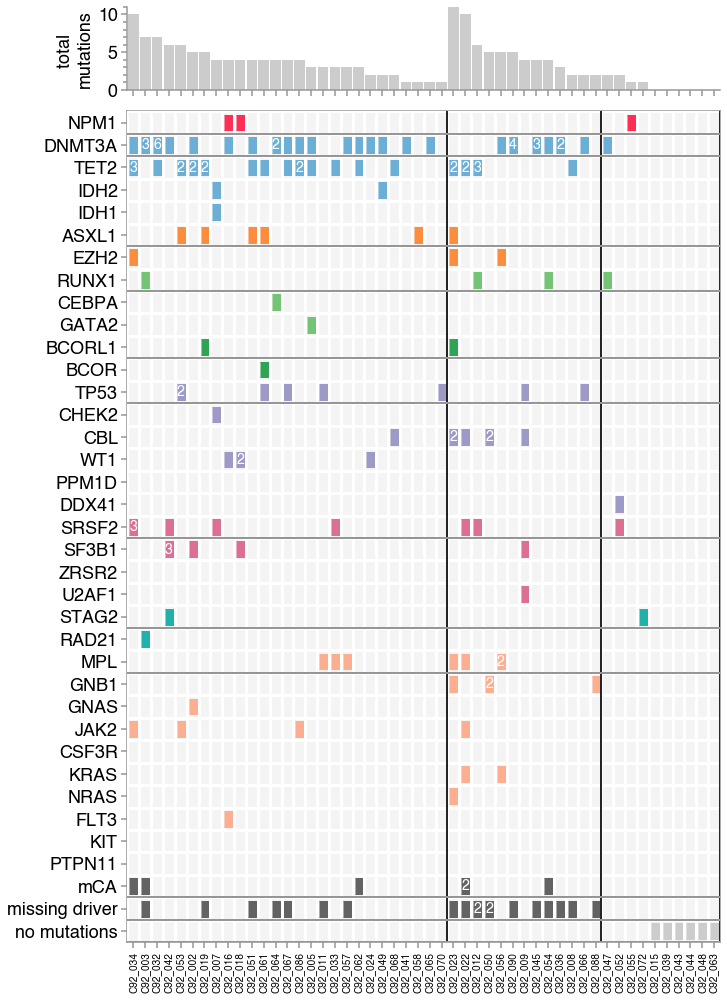

In [36]:
#plot the figure - cases
fig, axes = plt.subplots(2, 1, figsize = (10.2, 14), sharex = True, gridspec_kw={'height_ratios': [1, 10]})
plt.subplots_adjust(hspace=0.1)

ax0 = axes[0]
ax1 = axes[1]

helvetica_6 = 18

x = []
y = []
colors = []
annotation = []

x_bar = []
y_bar = []
c_bar = []

n = 0
for evol_type, samples_list in cases_evol_patterns_sorted_mutations.items():
#     print(evol_type)
    for sample_numbers in samples_list:
#         print(sample_numbers)
        n+=1
        sample = sample_numbers[0]
        number_genes_mutated = sample_numbers[1]
        number_mutations = sample_numbers[2]
        
        if sample in cases_gene_list.keys():
            sample_genes = cases_gene_list[sample]
        else:
            sample_genes = []
            
        if len(sample_genes)>0: #if the sample has a mutation
            for gene_mutated in sample_genes:
                mutation_ID = panel_list_dict[gene_mutated] #number assigned to the mutation (i.e. its y axis location)
                mutation_class = mutation_classes[gene_mutated]
                mutation_color = mutation_class_colors[mutation_class]
                x.append(sample)
                y.append(mutation_ID)
                colors.append(mutation_color)
                number_of_variants_in_gene = cases_gene_counts[sample][gene_mutated]
                annotation.append(number_of_variants_in_gene)
                

        else: #if the sample doesn't have any mutations
            x.append(sample)
            y.append(panel_list_dict['no mutations'])
            colors.append(grey2)
            annotation.append(0)

        x_bar.append(sample)
        y_bar.append(number_mutations)
        c_bar.append(grey2)
        
#         print(n)
            
ax0.bar(x_bar, y_bar, width = 0.9, color = c_bar) #histogram at top of plot
            
verts = list(zip([-2,2,2,-2],[-4,-4,4,4])) #rectangle to plot for each mutation
            
ax1.scatter(x, y, marker = verts, s = 250, color = colors)

for sample, gene, number_variants in zip(x, y, annotation):
    if number_variants>1:
        ax1.annotate(str(number_variants), xy = (sample, gene), ha = 'center', va = 'center', color = 'white', weight='bold', fontsize = 14)

ax1.set_yticks(list(panel_list_dict.values())) #number assigned to each gene (for y axis)
ax1.set_yticklabels(list(panel_list_dict.keys())) #name of the gene

ax1.set_xlim(-0.5, n-0.5)
ax1.set_ylim(-0.5, len(panel_list_dict)-0.5)
ax1.tick_params(labelsize = helvetica_6, axis = 'y')
ax1.tick_params(axis = 'both', which='major', length=6, width=1.5, color = '#969696')
ax1.tick_params(axis = 'both', which='minor', length=4, width=1.5, color = '#969696')

ax0.set_ylim(0, 11)
ax0.yaxis.set_major_locator(MultipleLocator(5))
ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.tick_params(labelsize = helvetica_6, axis = 'y')
ax0.set_ylabel('total \nmutations', fontsize = helvetica_6)
ax0.tick_params(axis = 'both', which='major', length=6, width=1.5, color = '#969696')
ax0.tick_params(axis = 'both', which='minor', length=4, width=1.5, color = '#969696')

for axis in ['top','right']:
    ax0.spines[axis].set_visible(False)  
    
for axis in ['bottom','left']:
    ax0.spines[axis].set_linewidth(1.5)
    ax0.spines[axis].set_color('#969696')

for axis in ['bottom','left', 'top', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color('#969696')

for i in range(-1, n):
    for j in range(-1, len(panel_list_dict)):
        ax1.plot([i+0.5, i+0.5], [-0.5, len(panel_list_dict)+0.5], color = 'white', lw = 3, zorder = 50)
        ax1.plot([-0.5, n+0.5], [j+0.5, j+0.5], color = 'white', lw = 3, zorder = 50)
        
# for i in range(-1, n):
#     for j in range(-1, len(panel_list_dict)):
#         ax1.plot([i+0.5, i+0.5], [-0.5, len(panel_list_dict)+0.5], color = grey1, lw = 3, zorder = 50)
#         ax1.plot([-0.5, n+0.5], [j+0.5, j+0.5], color = grey1, lw = 3, zorder = 50)
        
#divide up the gene categories
linecolor_categories = grey3
ax1.plot([-0.5, n+0.5], [-0.5, -0.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [0.5, 0.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [1.5, 1.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [11.5, 11.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [13.5, 13.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [17.5, 17.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [23.5, 23.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [25.5, 25.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [28.5, 28.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [30.5, 30.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [34.5, 34.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [35.5, 35.5], color = linecolor_categories, lw = 2, zorder = 60)
        
# ax1.xaxis.set_label_position('top') 

# ax0.set_xticks([])
ax1.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=90) 

ax1.fill_between([-0.5, n+0.5], -0.5, len(panel_list_dict)+0.5, color = grey2, zorder = 0, alpha = 0.2)

m = 0
for k, v in cases_evol_patterns_sorted_mutations.items():
    m+=len(v)
    ax1.plot([m-0.5,m-0.5], [-0.5,n+0.5], color = grey5, lw = 2, zorder = 50)
    
plt.tight_layout()
plt.show()

## Controls

In [37]:
controls_gene_list, controls_variants, controls_gene_counts = gene_mutation_incidence(control_trajectories)

In [38]:
controls_evol_patterns_sorted_genes, controls_evol_patterns_sorted_mutations = evolutionary_patterns_genes_mutations(controls_gene_list, controls_variants, control_evolutionary_patterns_dict)

In [39]:
for control in controls:
    control_with_mutations = 0
    for evol_pattern, sample_list in controls_evol_patterns_sorted_mutations.items():
        for sample in sample_list:
            if sample[0]==control:
                control_with_mutations+=1
    if control_with_mutations ==0:
        controls_evol_patterns_sorted_mutations['Late'].append((control, 0, 0))
        controls_evol_patterns_sorted_genes['Late'].append((control, 0, 0))

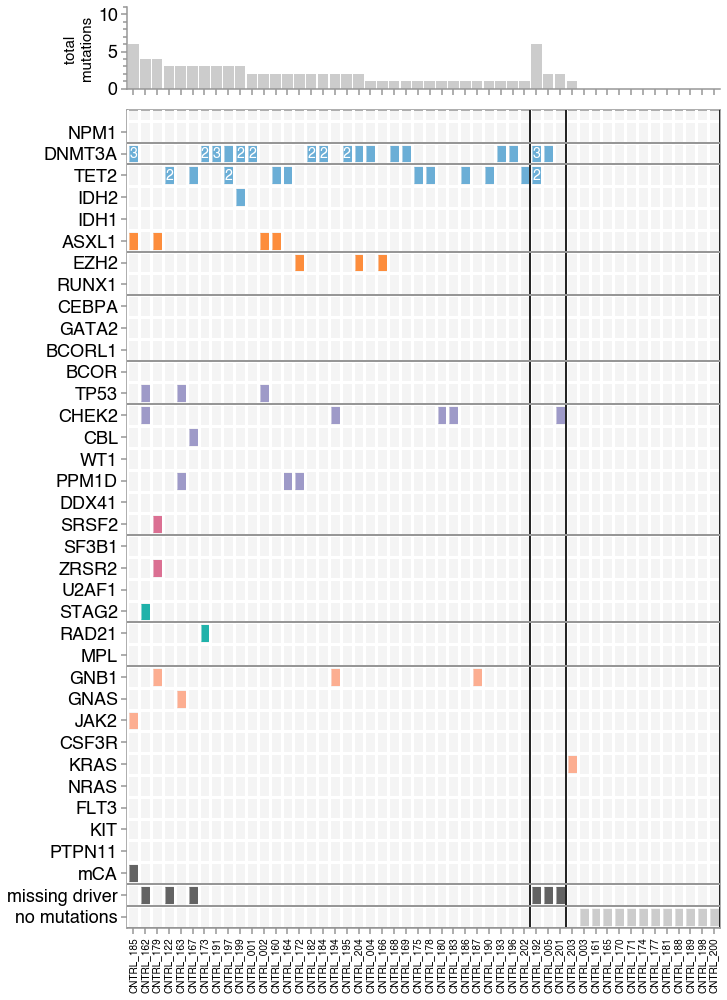

In [40]:
#plot the figure - controls
fig, axes = plt.subplots(2, 1, figsize = (10.2, 14), sharex = True, gridspec_kw={'height_ratios': [1, 10]})
plt.subplots_adjust(hspace=0.1)

ax0 = axes[0]
ax1 = axes[1]

x = []
y = []
colors = []
annotation = []

x_bar = []
y_bar = []
c_bar = []

helvetica_6 = 18

n = 0
for evol_type, samples_list in controls_evol_patterns_sorted_mutations.items():
#     print(evol_type)
    for sample_numbers in samples_list:
#         print(sample_numbers)
        n+=1
        sample = sample_numbers[0]
        number_genes_mutated = sample_numbers[1]
        number_mutations = sample_numbers[2]
        
        if sample in controls_gene_list.keys():
            sample_genes = controls_gene_list[sample]
        else:
            sample_genes = []
            
        if len(sample_genes)>0: #if the sample has a mutation
            for gene_mutated in sample_genes:
                mutation_ID = panel_list_dict[gene_mutated] #number assigned to the mutation (i.e. its y axis location)
                mutation_class = mutation_classes[gene_mutated]
                mutation_color = mutation_class_colors[mutation_class]
                x.append(sample)
                y.append(mutation_ID)
                colors.append(mutation_color)
                number_of_variants_in_gene = controls_gene_counts[sample][gene_mutated]
                annotation.append(number_of_variants_in_gene)
                

        else: #if the sample doesn't have any mutations
            x.append(sample)
            y.append(panel_list_dict['no mutations'])
            colors.append(grey2)
            annotation.append(0)

        x_bar.append(sample)
        y_bar.append(number_mutations)
        c_bar.append(grey2)
        
#         print(n)
            
ax0.bar(x_bar, y_bar, width = 0.9, color = c_bar) #histogram at top of plot
ax0.set_ylim(0, 11)
            
verts = list(zip([-2,2,2,-2],[-4,-4,4,4])) #rectangle to plot for each mutation
            
ax1.scatter(x, y, marker = verts, s = 250, color = colors)

for sample, gene, number_variants in zip(x, y, annotation):
    if number_variants>1:
        ax1.annotate(str(number_variants), xy = (sample, gene), ha = 'center', va = 'center', color = 'white', weight='bold', fontsize = 14)

ax1.set_yticks(list(panel_list_dict.values())) #number assigned to each gene (for y axis)
ax1.set_yticklabels(list(panel_list_dict.keys())) #name of the gene

ax1.set_xlim(-0.5, n-0.5)
ax1.set_ylim(-0.5, len(panel_list_dict))
ax1.tick_params(labelsize = helvetica_6, axis = 'y')
ax1.tick_params(axis = 'both', which='major', length=6, width=1.5, color = '#969696')
ax1.tick_params(axis = 'both', which='minor', length=4, width=1.5, color = '#969696')

ax0.set_ylim(0, 11)
ax0.yaxis.set_major_locator(MultipleLocator(5))
ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.tick_params(labelsize = helvetica_6, axis = 'y')
ax0.set_ylabel('total \nmutations', fontsize = 15)
ax0.tick_params(axis = 'both', which='major', length=6, width=1.5, color = '#969696')
ax0.tick_params(axis = 'both', which='minor', length=4, width=1.5, color = '#969696')

for axis in ['top','right']:
    ax0.spines[axis].set_visible(False)  
    
for axis in ['bottom','left']:
    ax0.spines[axis].set_linewidth(1.5)
    ax0.spines[axis].set_color('#969696')

for axis in ['bottom','left', 'top', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color('#969696')

for i in range(-1, n):
    for j in range(-1, len(panel_list_dict)):
        ax1.plot([i+0.5, i+0.5], [-0.5, len(panel_list_dict)+0.5], color = 'white', lw = 3, zorder = 50)
        ax1.plot([-0.5, n+0.5], [j+0.5, j+0.5], color = 'white', lw = 3, zorder = 50)
        
#divide up the gene categories
linecolor_categories = grey3
ax1.plot([-0.5, n+0.5], [-0.5, -0.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [0.5, 0.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [1.5, 1.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [11.5, 11.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [13.5, 13.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [17.5, 17.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [23.5, 23.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [25.5, 25.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [28.5, 28.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [30.5, 30.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [34.5, 34.5], color = linecolor_categories, lw = 2, zorder = 60)
ax1.plot([-0.5, n+0.5], [35.5, 35.5], color = linecolor_categories, lw = 2, zorder = 60)
        
# ax1.xaxis.set_label_position('top') 

# ax0.set_xticks([])
ax1.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=90) 

ax1.fill_between([-0.5, n+0.5], -0.5, len(panel_list_dict)+0.5, color = grey2, zorder = 0, alpha = 0.2)

m = 0
for k, v in controls_evol_patterns_sorted_mutations.items():
    m+=len(v)
    ax1.plot([m-0.5,m-0.5], [-0.5,n+0.5], color = grey5, lw = 2, zorder = 50)
    
plt.tight_layout()
plt.show()